# Data Exploration - Adzuna Jobs

## Objective
Understaning the job posting data structure, distributions, and quality.

## Questions to Answer
1. How many jobs do we have?
2. What types of roles are available?
3. Where are the jobs located?
4. What skills are most common?
5. Are there any data quality issues?

In [3]:
!pip3 install matplotlib

In [1]:
import json
import pandas as pd
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt

print("Libraries loaded")

Libraries loaded


## Load Data

In [2]:
# Load the job data
data_path = Path("../data/processed/adzuna_data_jobs.json")

with open(data_path, 'r', encoding='utf-8') as f:
    jobs_data = json.load(f)

print(f"Loaded {len(jobs_data)} jobs")

# Convert to DataFrame for easier analysis
df = pd.DataFrame(jobs_data)
print(f"\nColumns: {list(df.columns)}")

Loaded 500 jobs

Columns: ['job_title', 'job_description', 'company', 'location', 'category', 'job_type', 'experience_level', 'posted_date', 'job_url', 'skills', 'tags', 'role_type', 'source', 'fetched_at']


## Basic Statistics

In [3]:
# Show first few rows
print("Sample job:")

sample = df.iloc[0]
print(f"Title: {sample['job_title']}")
print(f"Company: {sample['company']}")
print(f"Location: {sample['location']}")
print(f"Skills: {sample['skills']}")
print(f"Tags: {sample['tags']}")
print(f"Role Type: {sample['role_type']}")

Sample job:
Title: Data Scientist
Company: Xplore Inc.
Location: Canada
Skills: ['feature engineering', 'machine learning', 'model deployment', 'python', 'pytorch', 'scikit-learn', 'sql', 'statistics', 'tensorflow', 'time-series forecasting']
Tags: ['Canada', 'Full-time', 'IT Jobs', 'remote']
Role Type: Data Scientist


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

print(f"\nTotal unique companies: {df['company'].nunique()}")
print(f"Total unique locations: {df['location'].nunique()}")

Missing values:
job_title             0
job_description       0
company               0
location              0
category              0
job_type             62
experience_level    401
posted_date           0
job_url               0
skills                0
tags                  0
role_type            54
source                0
fetched_at            0
dtype: int64

Total unique companies: 310
Total unique locations: 80


## Distribution Analysis

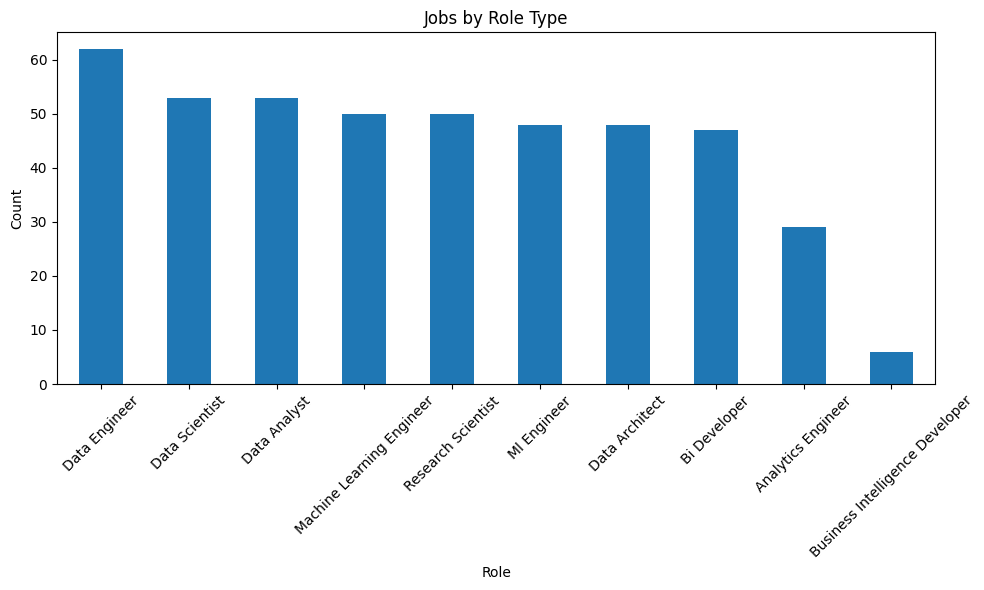


Role distribution:
  Data Engineer: 62
  Data Scientist: 53
  Data Analyst: 53
  Machine Learning Engineer: 50
  Research Scientist: 50
  Ml Engineer: 48
  Data Architect: 48
  Bi Developer: 47
  Analytics Engineer: 29
  Business Intelligence Developer: 6


In [5]:
# Role distribution
role_counts = df['role_type'].value_counts()

plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar')
plt.title('Jobs by Role Type')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nRole distribution:")
for role, count in role_counts.items():
    print(f"  {role}: {count}")

In [6]:
# Experience level distribution
exp_counts = df['experience_level'].value_counts(dropna=False)

print("Experience levels:")
for level, count in exp_counts.items():
    print(f"  {level}: {count}")

Experience levels:
  None: 401
  Senior: 69
  Lead/Principal: 29
  Junior: 1


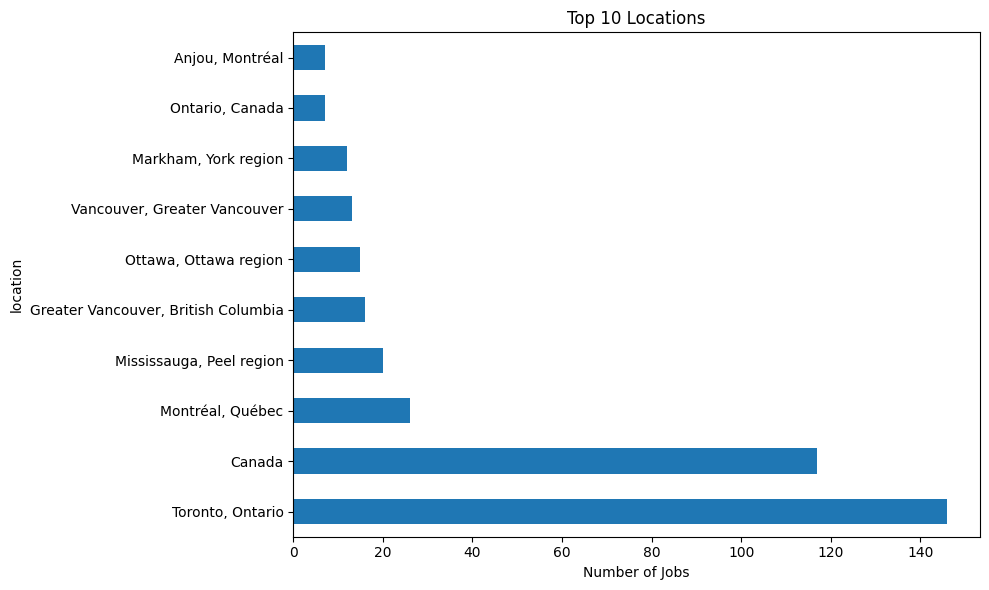

In [7]:
# Top locations
location_counts = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
location_counts.plot(kind='barh')
plt.title('Top 10 Locations')
plt.xlabel('Number of Jobs')
plt.tight_layout()
plt.show()

## Skills Analysis

In [8]:
# Extract all skills
all_skills = []
for skills_list in df['skills']:
    if isinstance(skills_list, list):
        all_skills.extend(skills_list)

print(f"Total skill mentions: {len(all_skills)}")
print(f"Unique skills: {len(set(all_skills))}")

# Count frequency
skill_freq = Counter(all_skills)
top_skills = skill_freq.most_common(20)

print("\nTop 20 skills:")
for i, (skill, count) in enumerate(top_skills, 1):
    pct = (count / len(df)) * 100
    print(f"{i:2d}. {skill:25s}: {count:3d} ({pct:.1f}%)")

Total skill mentions: 2795
Unique skills: 90

Top 20 skills:
 1. python                   : 250 (50.0%)
 2. sql                      : 246 (49.2%)
 3. machine learning         : 196 (39.2%)
 4. azure                    : 160 (32.0%)
 5. aws                      : 141 (28.2%)
 6. power bi                 : 122 (24.4%)
 7. snowflake                :  91 (18.2%)
 8. r                        :  83 (16.6%)
 9. statistics               :  80 (16.0%)
10. databricks               :  79 (15.8%)
11. pytorch                  :  74 (14.8%)
12. data visualization       :  69 (13.8%)
13. tableau                  :  68 (13.6%)
14. tensorflow               :  66 (13.2%)
15. spark                    :  66 (13.2%)
16. ci/cd                    :  62 (12.4%)
17. gcp                      :  57 (11.4%)
18. deep learning            :  53 (10.6%)
19. docker                   :  46 (9.2%)
20. kubernetes               :  44 (8.8%)


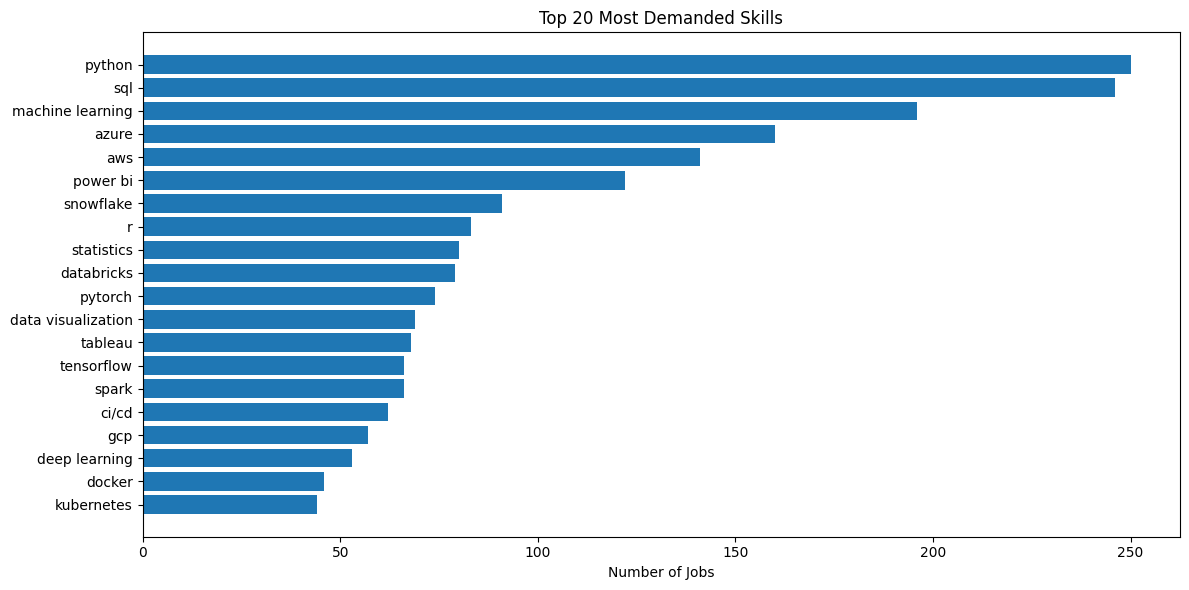

In [9]:
# Visualize top skills
skills_names = [skill for skill, count in top_skills]
skills_counts = [count for skill, count in top_skills]

plt.figure(figsize=(12, 6))
plt.barh(skills_names, skills_counts)
plt.xlabel('Number of Jobs')
plt.title('Top 20 Most Demanded Skills')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Description Analysis

Description statistics:
  Average: 5366 characters
  Median: 5454 characters
  Min: 464
  Max: 10000


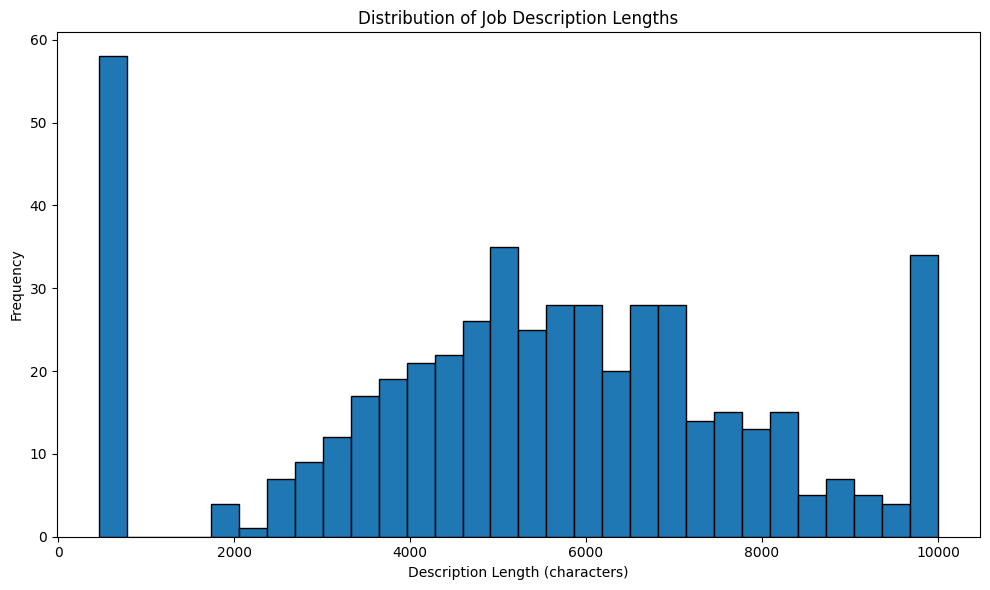

In [10]:
# Check description lengths
df['desc_length'] = df['job_description'].str.len()

print("Description statistics:")
print(f"  Average: {df['desc_length'].mean():.0f} characters")
print(f"  Median: {df['desc_length'].median():.0f} characters")
print(f"  Min: {df['desc_length'].min()}")
print(f"  Max: {df['desc_length'].max()}")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(df['desc_length'], bins=30, edgecolor='black')
plt.xlabel('Description Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Description Lengths')
plt.tight_layout()
plt.show()

## Key Findings

In [11]:
print("=" * 60)
print("KEY FINDINGS")
print("=" * 60)

print(f"\n1. Dataset size: {len(df)} jobs")
print(f"2. Most common role: {role_counts.index[0]} ({role_counts.values[0]} jobs)")
print(f"3. Top 3 skills:")
for i, (skill, count) in enumerate(top_skills[:3], 1):
    print(f"   {i}. {skill}: {count}")
print(f"4. Most jobs in: {location_counts.index[0]} ({location_counts.values[0]} jobs)")
print(f"5. Average skills per job: {len(all_skills) / len(df):.1f}")

print("\n" + "=" * 60)

KEY FINDINGS

1. Dataset size: 500 jobs
2. Most common role: Data Engineer (62 jobs)
3. Top 3 skills:
   1. python: 250
   2. sql: 246
   3. machine learning: 196
4. Most jobs in: Toronto, Ontario (146 jobs)
5. Average skills per job: 5.6

